In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sndata.csp import DR3
from sndata.sdss import Sako18Spec
from astropy.cosmology import FlatLambdaCDM
from scipy import stats
import astropy.units as u

In [2]:
sdss_combined = pd.read_csv('~/Desktop/Research/SN-Spectral-Evolution/results/sdss_combined.csv')
sdss_combined

,feat_name,obj_id,time,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,...,agePEGASE,ageloPEGASE,agehiPEGASE,minchi2PEGASE,Notes,delta_t,is_peak,branch_type,arcmin,kpc
0,pW6,19128,2454387.5,5630.787447,5932.631261,8144.168668,0.0,341.659397,16.352920,0.0,...,NaN,NaN,NaN,NaN,NaN,0.1,True,BL,NaN,NaN
1,pW2,2017,2453636.5,3908.025238,4040.182181,NaN,0.0,NaN,17.092118,0.0,...,1.25,1.08,1.39,0.14,NaN,0.1,True,SS,0.034500,43.077351
2,pW1,2017,2453636.5,3615.136877,3908.025238,13865.174056,0.0,323.138916,52.658139,0.0,...,1.25,1.08,1.39,0.14,NaN,0.1,True,SS,0.034500,43.077351
3,pW2,19128,2454387.5,3942.640340,4073.335600,8793.661154,0.0,735.823388,8.520702,0.0,...,NaN,NaN,NaN,NaN,NaN,0.1,True,BL,NaN,NaN
4,pW1,2689,2453637.5,3657.035407,3918.106397,11820.961436,0.0,443.806031,103.331980,0.0,...,5.58,4.75,9.70,6.98,NaN,0.1,True,NaN,0.049833,62.012352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,pW7,2165,2453641.5,5919.931260,6572.577243,9137.197106,0.0,241.346074,209.514632,0.0,...,0.86,0.03,4.07,8.78,NaN,6.7,True,CL,0.012000,15.057214
797,pW1,19968,2454406.5,3507.901777,3921.776287,17654.228010,0.0,76.274254,158.092375,0.0,...,2.41,2.41,2.72,61.46,NaN,6.8,True,SS,0.027500,34.389803
798,pW3,8719,2453683.5,4084.014864,4480.981091,14043.481108,0.0,229.733128,70.137655,0.0,...,0.20,0.08,0.64,5.96,NaN,7.0,True,NaN,0.029333,36.667727
799,pW1,8719,2453683.5,3552.557347,3932.169859,16685.149802,0.0,230.510419,134.423657,0.0,...,0.20,0.08,0.64,5.96,NaN,7.0,True,NaN,0.029333,36.667727


In [3]:
print(sdss_combined.columns.tolist())

['feat_name', 'obj_id', 'time', 'feat_start', 'feat_end', 'vel', 'vel_err', 'vel_samperr', 'pew', 'pew_err', 'pew_samperr', 'area', 'area_err', 'area_samperr', 'spec_flag', 'feat_flag', 'notes', 'phase', 'spec_type', 'RA', 'DEC', 'Nsearchepoch', 'IAUName', 'Classification', 'Peakrmag', 'MJDatPeakrmag', 'NepochSNR5', 'nSNspec', 'nGALspec', 'zspecHelio', 'zspecerrHelio', 'zCMB', 'zerrCMB', 'x0SALT2zspec', 'x0errSALT2zspec', 'x1SALT2zspec', 'x1errSALT2zspec', 'cSALT2zspec', 'cerrSALT2zspec', 'PeakMJDSALT2zspec', 'PeakMJDderrSALT2zspec', 'muSALT2zspec', 'muerrSALT2zspec', 'fitprobSALT2zspec', 'chi2SALT2zspec', 'ndofSALT2zspec', 'deltaMLCS2k2zspec', 'deltaerrMLCS2k2zspec', 'avMLCS2k2zspec', 'averrMLCS2k2zspec', 'PeakMJDMLCS2k2zspec', 'PeakMJDerrMLCS2k2zspec', 'muMLCS2k2zspec', 'muerrMLCS2k2zspec', 'fitprobMLCS2k2zspec', 'chi2MLCS2k2zspec', 'ndofMLCS2k2zspec', 'PIaPSNIDzspec', 'logprobIaPSNIDzspec', 'lcqualityIaPSNIDzspec', 'PIbcPSNIDzspec', 'logprobIbcPSNIDzspec', 'lcqualityIbcPSNIDzspec', 

In [4]:
dr3 = DR3()
dr3.download_module_data()

sako_18_spec = Sako18Spec()
sako_18_spec.download_module_data()

In [5]:
sdss_1_table = sako_18_spec.load_table('master').to_pandas(index='CID')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: TableReplaceWarning: converted column 'ndofSALT2zspec' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: TableReplaceWarning: converted column 'ndofMLCS2k2zspec' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: TableReplaceWarning: converted column 'lcqualityIaPSNIDzspec' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: TableReplaceWarning: converted column 'lcqualityIbcPSNIDzspec' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: TableReplaceWarning: converted column 'lcqualityIIPSNIDzs

In [6]:
@np.vectorize
def dist_mod_chisq(ho):
    cosmo = FlatLambdaCDM(H0=ho * u.km / u.s / u.Mpc, Om0=0.315)
    model_dist_mod = cosmo.distmod(sdss_combined['zCMB'])
    dist_mod = sdss_combined['muSALT2zspec']
    dist_mod = dist_mod.to_numpy()
    dist_mod = dist_mod*u.mag
    # do we need to worry about error in the Om0 calculation
    chisq, p = scipy.stats.chisquare(dist_mod, model_dist_mod)
    chisq = chisq / u.mag
    return(chisq)

In [7]:
#dist_mod_chisq = np.vectorize(dist_mod_chisq) same thing as @np.vectorize

In [8]:
ho_fit = scipy.optimize.minimize(dist_mod_chisq, 70)
ho_fit

      fun: 0.716862944405646
 hess_inv: array([[24.57484395]])
      jac: array([8.12858343e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([68.32005572])

In [ ]:
plot model against actual distance moduli and plot residuals

In [9]:
# creating cosmo model
our_cosmo = FlatLambdaCDM(H0 = 68.32005572 * u.km / u.s / u.Mpc, Om0=0.315 )

In [10]:
our_cosmo

FlatLambdaCDM(H0=68.3 km / (Mpc s), Om0=0.315, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)

In [26]:
zvals = np.linspace(0, 6, 801)
dist = our_cosmo.angular_diameter_distance(zvals)
ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1])*u.Gyr
#ageticks = [z_at_value(our_cosmo.age, age) for age in ages]

(0.0, 5.9)

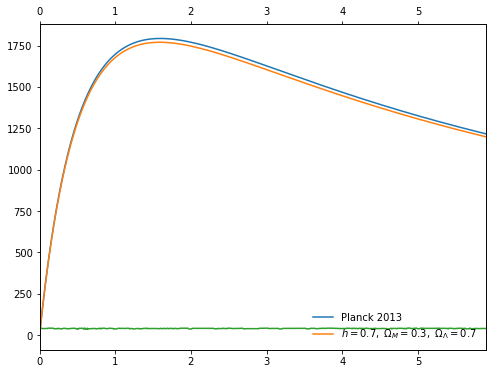

In [27]:
from astropy.cosmology import Planck13
dist2 = Planck13.angular_diameter_distance(zvals)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(zvals, dist2, label='Planck 2013')
ax.plot(zvals, dist, label=
        '$h=0.7,\ \Omega_M=0.3,\ \Omega_\Lambda=0.7$')
ax.plot(zvals, dist_mod)
ax.legend(frameon=0, loc='lower right')
ax2 = ax.twiny()
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)

In [60]:
dist_mod_err = sdss_combined['muerrSALT2zspec']
dist_mod_err = dist_mod_err.to_numpy()
dist_mod_err = dist_mod_err
dist_mod_err

array([0.23, 0.25, 0.25, 0.23, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19,
       0.19, 0.19, 0.19, 0.19, 0.23, 0.23, 0.23, 0.25, 0.25, 0.23, 0.23,
       0.25, 0.25, 0.25, 0.18, 0.18, 0.19, 0.18, 0.18, 0.18, 0.19, 0.19,
       0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.18, 0.19, 0.2 , 0.2 , 0.2 ,
       0.2 , 0.2 , 0.2 , 0.2 , 0.19, 0.19, 0.19, 0.18, 0.19, 0.18, 0.18,
       0.18, 0.18, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.19, 0.19,
       0.19, 0.18, 0.27, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.24,
       0.2 , 0.27, 0.24, 0.24, 0.27, 0.27, 0.27, 0.24, 0.27, 0.18, 0.18,
       0.18, 0.18, 0.18, 0.18, 0.2 , 0.18, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.18, 0.18, 0.18, 0.18, 0.18, 0.21, 0.21, 0.18, 0.18, 0.23, 0.18,
       0.23, 0.23, 0.21, 0.23, 0.23, 0.23, 0.18, 0.18, 0.18, 0.18, 0.18,
       0.18, 0.23, 0.21, 0.21, 0.21, 0.19, 0.19, 0.19, 0.18, 0.19, 0.18,
       0.19, 0.19, 0.19, 0.19, 0.19, 0.18, 0.19, 0.19, 0.19, 0.19, 0.23,
       0.18, 0.18, 0.23, 0.23, 0.23, 0.18, 0.18, 0.

In [96]:
model_dist_mod = our_cosmo.distmod(sdss_combined['zCMB'])
model_no_units = model_dist_mod/u.mag
model_no_units = [float(i) for i in model_no_units]
z = sdss_combined['zCMB']
dist_mod = sdss_combined['muSALT2zspec']
dist_mod = dist_mod.to_numpy()
dist_mod_units = dist_mod*u.mag
model_dist = our_cosmo.angular_diameter_distance(z)
log_y_data = np.log(model_no_units)
np.polyfit(z, log_y_data, 1)

array([0.42329637, 3.5991767 ])

In [102]:
z_log = np.exp((model_no_units-3.5991767)/0.42329637)

TypeError: unsupported operand type(s) for -: 'list' and 'float'

Text(0, 0.5, 'distance modulus (mag)')

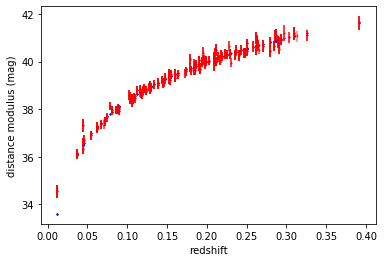

In [103]:
plt.scatter(z, model_dist_mod,  color='blue', s=0.8, alpha=0.5,label=
        '$h=0.7,\ \Omega_M=0.3,\ \Omega_\Lambda=0.7$')
plt.scatter(z, dist_mod_units, color = 'red', s=0.8, alpha=0.5)
#plt.scatter(z, model_dist_mod-dist_mod_units, color = 'green', s=0.8, alpha=0.5)
#plt.plot(z_log, model_no_units)
plt.errorbar(z, dist_mod, yerr = dist_mod_err, fmt = 'none', color = 'red', s=0.8, alpha = 0.5)
plt.xlabel('redshift')
plt.ylabel('distance modulus (mag)')

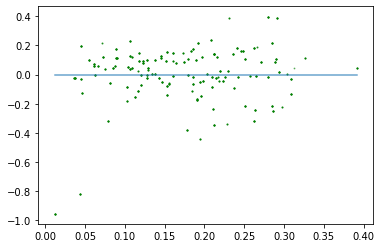

In [106]:
zeros = np.zeros(len(z))
plt.scatter(z, model_dist_mod-dist_mod_units, color = 'green', s=0.8, alpha=0.5)
plt.plot(z, zeros, alpha = 0.5)